In [895]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns 

In [989]:
Big_Mart_Train = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Big_Mart_Regression\Train.csv")

In [990]:
Big_Mart_Test = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Big_Mart_Regression\Test.csv")

## Exploratory Data Analysis

In [991]:
Big_Mart_Train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [992]:
Big_Mart_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [993]:
Big_Mart_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [994]:
Big_Mart_Train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [995]:
## Filling_Up_NaN's

In [996]:
Big_Mart_Train['Outlet_Size'] = Big_Mart_Train['Outlet_Size'].fillna(Big_Mart_Train['Outlet_Size'].mode()[0])

In [997]:
Big_Mart_Train['Item_Weight'] = Big_Mart_Train['Item_Weight'].fillna(Big_Mart_Train['Item_Weight'].mean())

In [998]:
Big_Mart_Train['Item_Fat_Content'] = Big_Mart_Train['Item_Fat_Content'].replace({'low fat':'Low Fat' , 'LF':'Low Fat' , 'reg':'Regular'})

In [999]:
data = {}
for col in Big_Mart_Train.columns:
    if Big_Mart_Train[col].dtype == 'object':
        uniques = Big_Mart_Train[col].unique()
        data[col] = uniques

In [1000]:
import warnings 
warnings.filterwarnings('ignore')

## Visulization

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

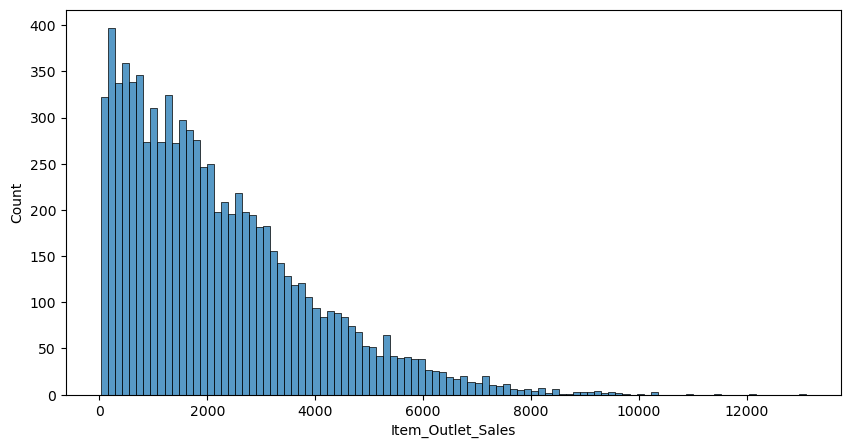

In [1003]:
plt.figure(figsize = (10,5))
sns.histplot(data = Big_Mart_Train , x = Big_Mart_Train['Item_Outlet_Sales'] , bins = 100)

Text(0.5, 1.0, 'Outlet Size Distribution by Item_Outlet_Sales')

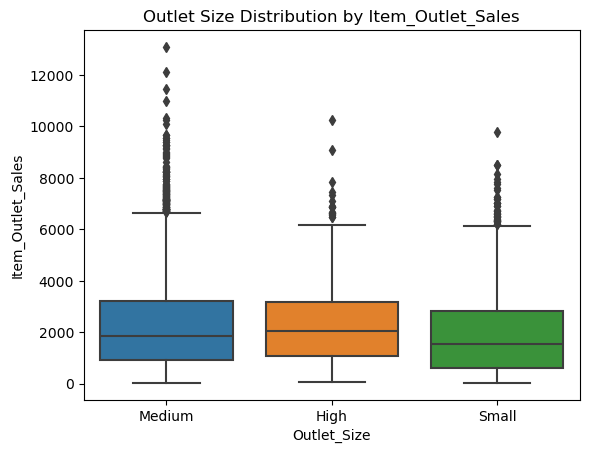

In [909]:
sns.boxplot(data = Big_Mart_Train , x = Big_Mart_Train['Outlet_Size'] ,y = Big_Mart_Train['Item_Outlet_Sales']  )
plt.title('Outlet Size Distribution by Item_Outlet_Sales')

### observation outlet size medium is giving most sales then high then the small respectively.

In [910]:
Big_Mart_Train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.87,Low Fat,0.06,Snack Foods,214.52,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38
8519,FDS36,8.38,Regular,0.05,Baking Goods,108.16,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.28
8520,NCJ29,10.60,Low Fat,0.04,Health and Hygiene,85.12,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11
8521,FDN46,7.21,Regular,0.15,Snack Foods,103.13,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.60


In [911]:
Big_Mart_Train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [1005]:
mean_visibility = Big_Mart_Train.groupby(['Item_Identifier'])['Item_Visibility'].mean()
Big_Mart_Train['Item_Visiblity_Ratio'] = Big_Mart_Train['Item_Visibility']/Big_Mart_Train['Item_Identifier'].map(mean_visibility)


In [1006]:
Big_Mart_Test['Item_Weight'] = Big_Mart_Test['Item_Weight'].fillna(Big_Mart_Test['Item_Weight'].mean())
Big_Mart_Test['Outlet_Size'] = Big_Mart_Test['Outlet_Size'].fillna(Big_Mart_Test['Outlet_Size'].mode()[0])
Big_Mart_Test['Item_Fat_Content'] = Big_Mart_Test['Item_Fat_Content'].replace({'low fat':'Low Fat' , 'LF':'Low Fat' , 'reg':'Regular'})
mean_visibility = Big_Mart_Test.groupby(['Item_Identifier'])['Item_Visibility'].mean()
Big_Mart_Test['Item_Visiblity_Ratio'] = Big_Mart_Test['Item_Visibility']/Big_Mart_Test['Item_Identifier'].map(mean_visibility)
Big_Mart_Test['Outlet_Age'] = 2025- Big_Mart_Test['Outlet_Establishment_Year']

In [1007]:
Big_Mart_Train['Outlet_Age'] = 2025- Big_Mart_Train['Outlet_Establishment_Year']

In [917]:
Big_Mart_Train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visiblity_Ratio,Outlet_Age
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14,0.92,26
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42,1.00,16
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,0.83,26
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38,0.00,27
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71,0.00,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.87,Low Fat,0.06,Snack Foods,214.52,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38,0.92,38
8519,FDS36,8.38,Regular,0.05,Baking Goods,108.16,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.28,1.00,23
8520,NCJ29,10.60,Low Fat,0.04,Health and Hygiene,85.12,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11,1.00,21
8521,FDN46,7.21,Regular,0.15,Snack Foods,103.13,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.60,1.20,16


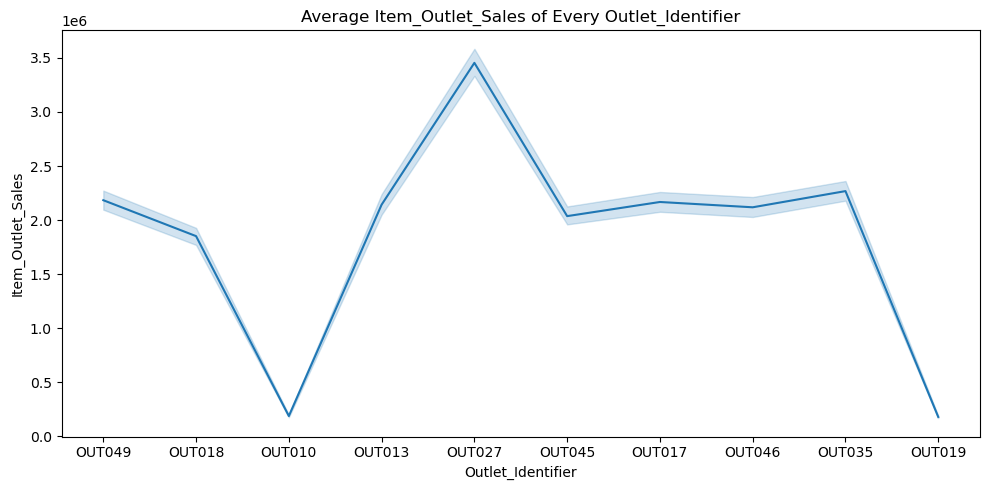

In [918]:
## mean of every outlet_Identifier
plt.figure(figsize = (10,5))
sns.lineplot(data = Big_Mart_Train ,x = 'Outlet_Identifier', y = 'Item_Outlet_Sales',estimator='sum', markers = 'x')
plt.title('Average Item_Outlet_Sales of Every Outlet_Identifier')
plt.tight_layout()

Text(0.5, 1.0, 'Item_MRP Spread')

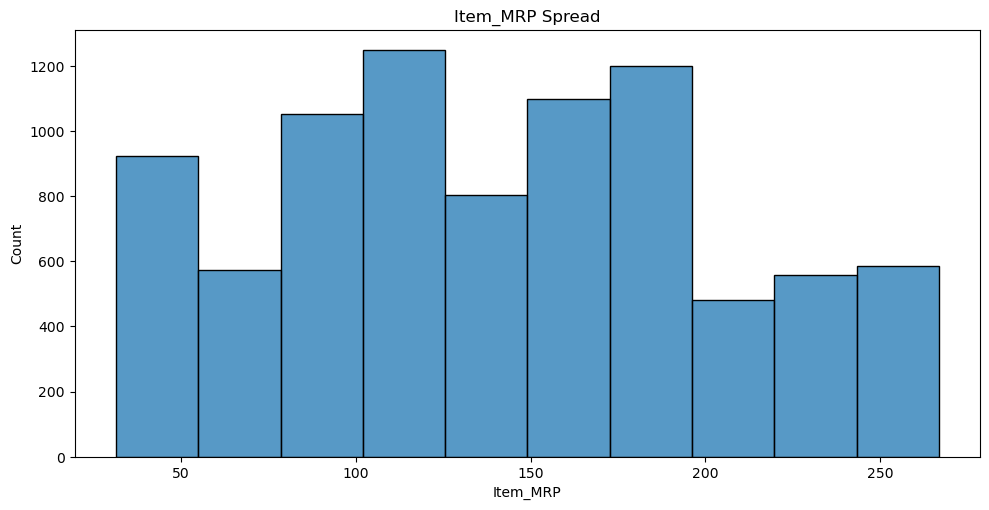

In [919]:
plt.figure(figsize = (10,5))
sns.histplot(data = Big_Mart_Train  , x = 'Item_MRP' , bins = 10)
plt.tight_layout()
plt.title('Item_MRP Spread')

Text(0.5, 1.0, 'Sales by Outlet_Type')

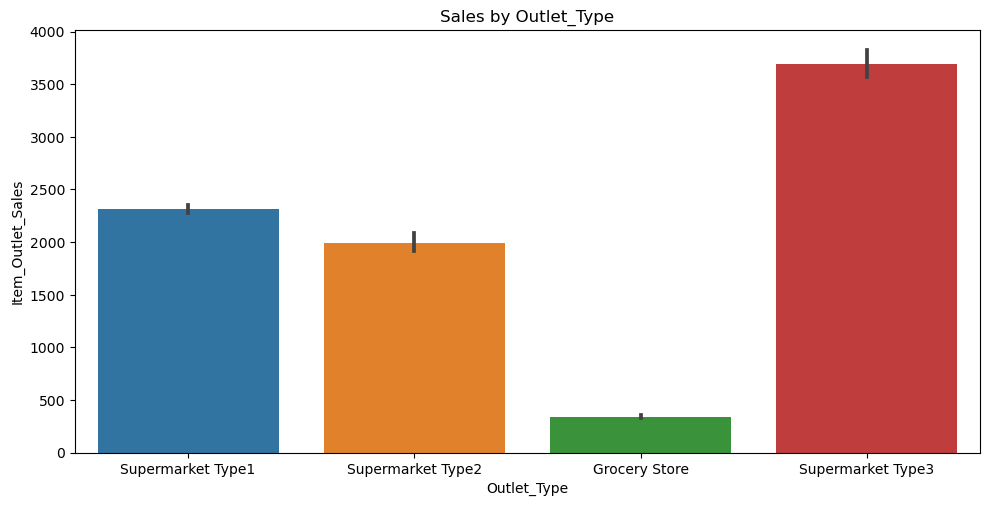

In [920]:
plt.figure(figsize = (10,5))
sns.barplot(data = Big_Mart_Train  , x = 'Outlet_Type' , y = 'Item_Outlet_Sales' )
plt.tight_layout()
plt.title('Sales by Outlet_Type')

## Supermarket_3 is giving highest sales among all 

Text(0.5, 1.0, 'Outlet by Outlet Establishment_Year')

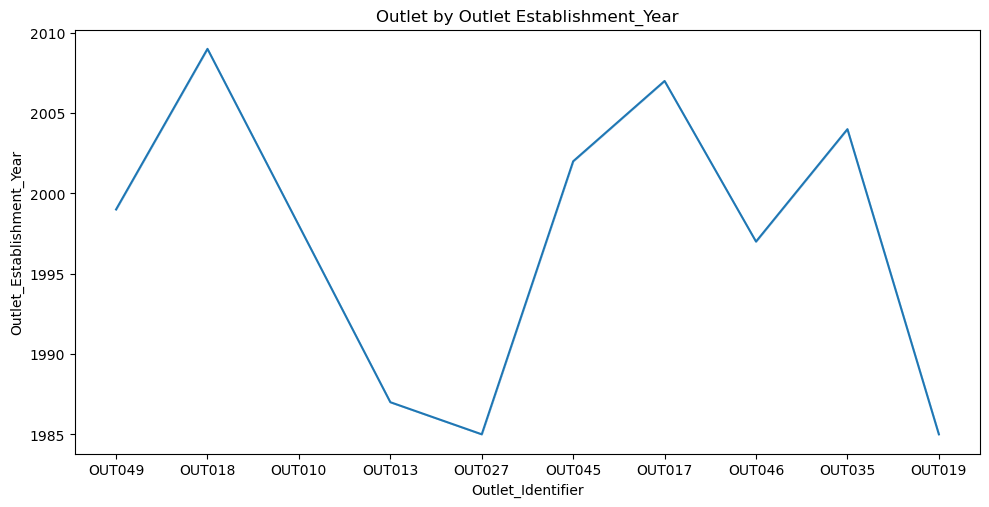

In [921]:
plt.figure(figsize = (10,5))
sns.lineplot(data = Big_Mart_Train  , x = 'Outlet_Identifier' , y = 'Outlet_Establishment_Year' )
plt.tight_layout()
plt.title('Outlet by Outlet Establishment_Year')

In [922]:
sales_outlet = Big_Mart_Train.groupby(['Outlet_Identifier','Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum().reset_index()

In [923]:
sales_outlet

,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
0,OUT010,1998,188340.17
1,OUT013,1987,2142663.58
2,OUT017,2007,2167465.29
3,OUT018,2009,1851822.83
4,OUT019,1985,179694.09
5,OUT027,1985,3453926.05
6,OUT035,2004,2268122.94
7,OUT045,2002,2036725.48
8,OUT046,1997,2118395.17
9,OUT049,1999,2183969.81


Text(0.5, 1.0, 'Outlet by Establishment Year and there Sales ')

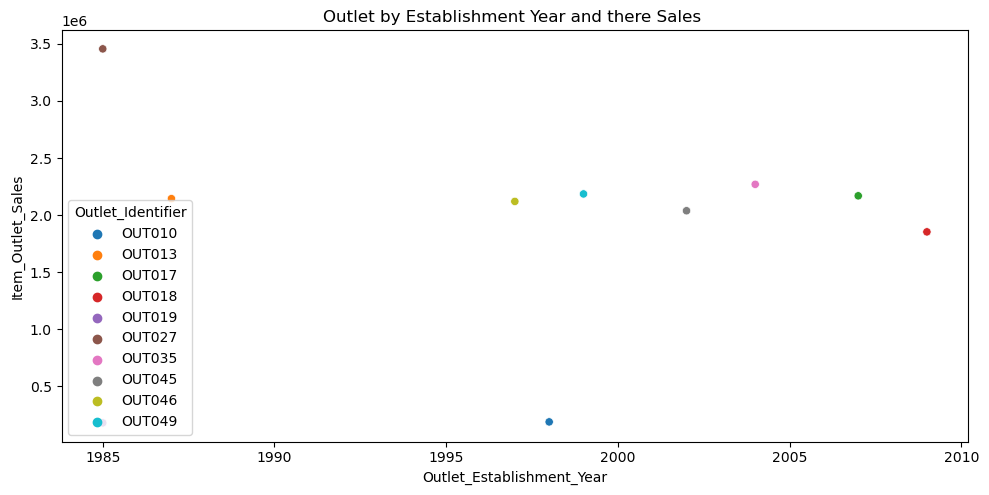

In [924]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = sales_outlet  , x =  'Outlet_Establishment_Year'  , y = 'Item_Outlet_Sales' , hue =  'Outlet_Identifier')
plt.tight_layout()
plt.title('Outlet by Establishment Year and there Sales ')

In [925]:
split = Big_Mart_Train.groupby(['Item_Type'])['Item_MRP'].sum()

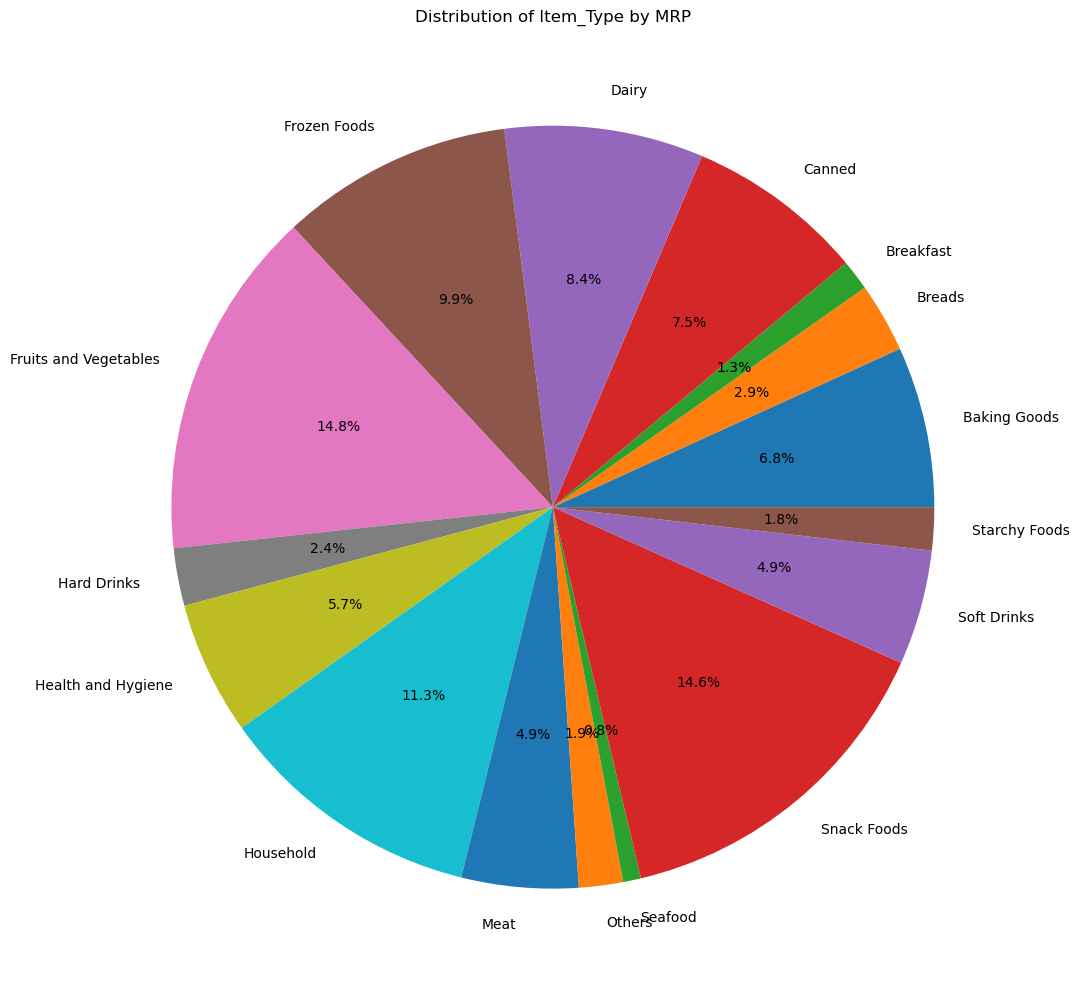

In [1012]:
plt.figure(figsize = (11,11))
plt.pie( split, labels = split.index ,autopct = '%0.1f%%' )
plt.title('Distribution of Item_Type by MRP')
plt.tight_layout()

In [927]:
## Target and X_variables

In [928]:
Target = Big_Mart_Train['Item_Outlet_Sales']
Big_Mart_Train = Big_Mart_Train[Big_Mart_Train.columns.difference(['Item_Outlet_Sales'])]

In [929]:
##Outliers
numeric_columns = []

for col in Big_Mart_Train.columns:
    if Big_Mart_Train[col].dtype == 'int64' or Big_Mart_Train[col].dtype == 'float64':
        numeric_columns.append(col)
        


In [930]:
numeric = Big_Mart_Train[numeric_columns]

In [931]:
numeric

,Item_MRP,Item_Visibility,Item_Visiblity_Ratio,Item_Weight,Outlet_Age,Outlet_Establishment_Year
0,249.81,0.02,0.92,9.30,26,1999
1,48.27,0.02,1.00,5.92,16,2009
2,141.62,0.02,0.83,17.50,26,1999
3,182.09,0.00,0.00,19.20,27,1998
4,53.86,0.00,0.00,8.93,38,1987
...,...,...,...,...,...,...
8518,214.52,0.06,0.92,6.87,38,1987
8519,108.16,0.05,1.00,8.38,23,2002
8520,85.12,0.04,1.00,10.60,21,2004
8521,103.13,0.15,1.20,7.21,16,2009


## Finding Out Outliers

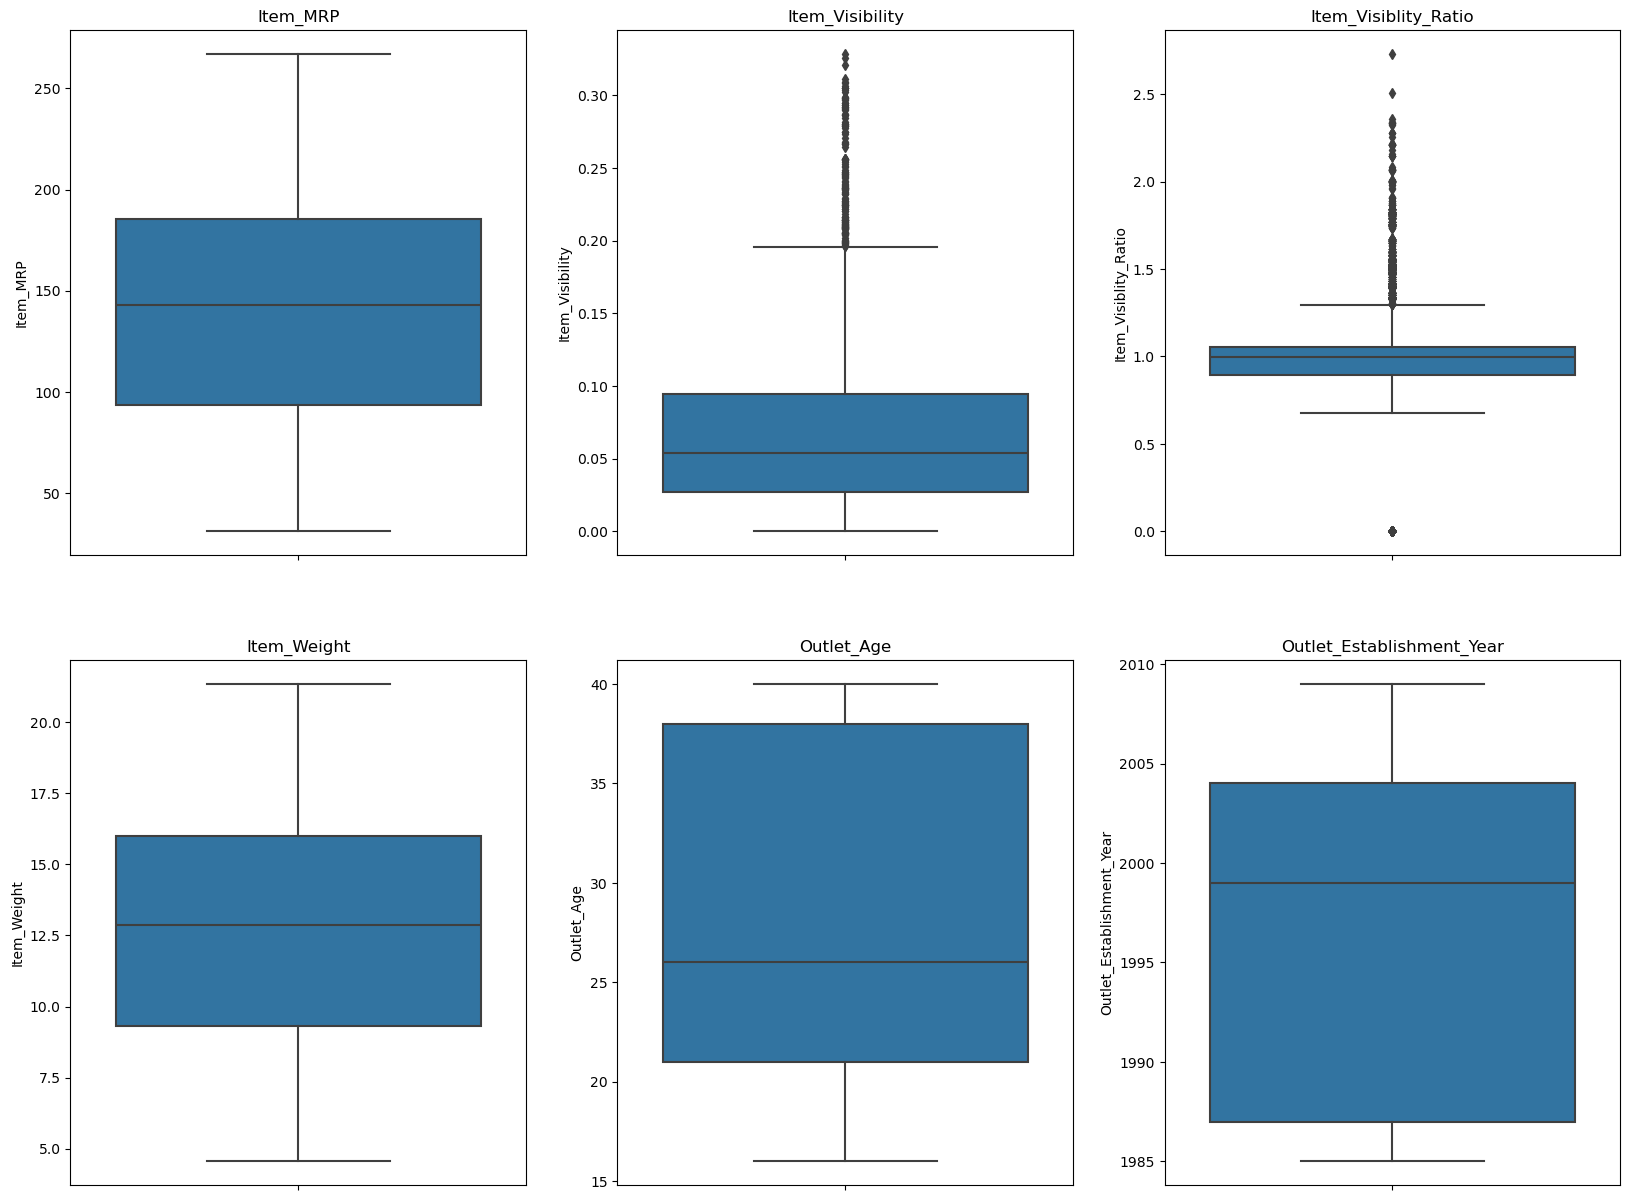

In [932]:
fig,axes= plt.subplots(2,3,figsize = (20,15))
axes = axes.flatten()

for i,col in enumerate(numeric.columns):
    sns.boxplot(y = numeric[col],ax = axes[i])
    axes[i].set_title(col)

for j in range(len(numeric.columns),len(axes)):
    fig.delaxes(axes[j])

In [933]:
for col in numeric.columns:
    Big_Mart_Train[col] = Big_Mart_Train[col].clip(lower = Big_Mart_Train[col].quantile(0.01) , upper = Big_Mart_Train[col].quantile(0.99))

In [934]:
numeric_columns = []

for col in Big_Mart_Test.columns:
    if Big_Mart_Test[col].dtype == 'int64' or Big_Mart_Test[col].dtype == 'float64':
        numeric_columns.append(col)

numeric = Big_Mart_Test[numeric_columns]

### Treating_Outliers

In [935]:
for col in numeric.columns:
    lower = Big_Mart_Train[col].quantile(0.01)
    upper = Big_Mart_Train[col].quantile(0.99)
    Big_Mart_Test[col] = Big_Mart_Test[col].clip(lower = lower  , upper = upper)

## Encoding

In [936]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

columns_to_encode = ['Item_Identifier','Outlet_Size','Outlet_Location_Type']
label_encoders = {}

# Fit on train
for col in columns_to_encode:
    le = LabelEncoder()
    Big_Mart_Train[col] = le.fit_transform(Big_Mart_Train[col])
    label_encoders[col] = le

# Transform test safely
for col in columns_to_encode:
    le = label_encoders[col]
    # Map unseen labels to 'Unknown'
    Big_Mart_Test[col] = Big_Mart_Test[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
    # Add 'Unknown' to classes
    le.classes_ = np.append(le.classes_, 'Unknown')
    # Transform
    Big_Mart_Test[col] = le.transform(Big_Mart_Test[col])


In [937]:
Big_Mart_Train.columns.difference(['Item_Identifier','Outlet_Size','Outlet_Location_Type'])

Index(['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Item_Visibility',
       'Item_Visiblity_Ratio', 'Item_Weight', 'Outlet_Age',
       'Outlet_Establishment_Year', 'Outlet_Identifier', 'Outlet_Type'],
      dtype='object')

In [938]:
k = Big_Mart_Train[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Type']]
k

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Type
0,Low Fat,Dairy,OUT049,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Supermarket Type2
2,Low Fat,Meat,OUT049,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Grocery Store
4,Low Fat,Household,OUT013,Supermarket Type1
...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,Supermarket Type1
8519,Regular,Baking Goods,OUT045,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Supermarket Type2


In [939]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(drop = 'first' , sparse_output = False , handle_unknown='ignore' )
one_hot_encoded = one_hot.fit_transform(Big_Mart_Train[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Type']])
one_hot_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [940]:
one_df_ = pd.DataFrame(data = one_hot_encoded,columns = one_hot.get_feature_names_out(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Type']))

In [941]:
one_hot_encoded_test = one_hot.transform(Big_Mart_Test[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Type']])
one_hot_encoded_test
one_df_test = pd.DataFrame(data = one_hot_encoded_test,columns = one_hot.get_feature_names_out(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Type']))

In [942]:
Big_Mart_Train.drop(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Type'],axis = 1,inplace = True)

In [943]:
Big_Mart_Train = pd.concat([Big_Mart_Train,one_df_],axis = 1)

In [944]:
Big_Mart_Test = pd.concat([Big_Mart_Test,one_df_test],axis = 1)

In [945]:
Big_Mart_Train

,Item_Identifier,Item_MRP,Item_Visibility,Item_Visiblity_Ratio,Item_Weight,Outlet_Age,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Item_Fat_Content_Regular,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,249.81,0.02,0.92,9.30,26,1999,0,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
1,8,48.27,0.02,1.00,5.92,16,2009,2,1,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,662,141.62,0.02,0.83,17.50,26,1999,0,1,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
3,1121,182.09,0.00,0.00,19.20,27,1998,2,1,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1297,53.86,0.00,0.00,8.93,38,1987,2,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,214.52,0.06,0.92,6.87,38,1987,2,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
8519,897,108.16,0.05,1.00,8.38,23,2002,1,1,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
8520,1357,85.12,0.04,1.00,10.60,21,2004,1,2,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
8521,681,103.13,0.15,1.20,7.21,16,2009,2,1,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


## Standard Scaler

In [946]:
std = StandardScaler()
data_std_columns =pd.DataFrame(std.fit_transform(Big_Mart_Train),columns = Big_Mart_Train.columns)

In [947]:
data_std = data_std_columns

##Variance_Inflation_Factor

In [948]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.DataFrame()
df['features'] = data_std.columns
df['variance_inflation_factor'] = [variance_inflation_factor(data_std.values,i) for i in range(data_std.shape[1])]
pd.set_option("display.float_format","{:.2f}".format)

In [949]:
df

,features,variance_inflation_factor
0,Item_Identifier,2.69
1,Item_MRP,1.01
2,Item_Visibility,1.23
3,Item_Visiblity_Ratio,1.55
4,Item_Weight,1.01
5,Outlet_Age,4049897.88
6,Outlet_Establishment_Year,inf
7,Outlet_Location_Type,853356.14
8,Outlet_Size,1312110.69
9,Item_Fat_Content_Regular,1.22


## TRAIN_TEST_SPLIT

In [950]:
from sklearn.model_selection import train_test_split
Train_X,Test_X,Train_Y,Test_Y = train_test_split(data_std,Target, test_size= 0.2,random_state = 101)

## Feature_Selection

In [951]:
from xgboost import XGBRegressor

In [952]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = XGBRegressor(), n_features_to_select = 20)
rfe.fit(Train_X,Train_Y)
selected_columns_rfe  = Train_X.columns[rfe.support_]

In [953]:
from sklearn.feature_selection import SelectKBest,f_regression
select_K = SelectKBest(score_func  = f_regression ,k = 20)
select_K.fit(Train_X,Train_Y)
selected_columns_select_k = Train_X.columns[select_K.get_support()]

In [954]:
Train_X.isna().sum()

Item_Identifier                    0
Item_MRP                           0
Item_Visibility                    0
Item_Visiblity_Ratio               0
Item_Weight                        0
Outlet_Age                         0
Outlet_Establishment_Year          0
Outlet_Location_Type               0
Outlet_Size                        0
Item_Fat_Content_Regular           0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
O

In [955]:
final_selected_columns = list(set(list(selected_columns_rfe) + list(selected_columns_select_k)))

In [956]:
data_std = data_std[final_selected_columns]

In [957]:
final_selected_columns

['Outlet_Identifier_OUT027',
 'Item_Type_Breads',
 'Item_Fat_Content_Regular',
 'Outlet_Identifier_OUT046',
 'Item_Type_Breakfast',
 'Item_Identifier',
 'Outlet_Location_Type',
 'Item_Type_Dairy',
 'Item_Type_Household',
 'Outlet_Identifier_OUT013',
 'Item_Type_Health and Hygiene',
 'Outlet_Identifier_OUT035',
 'Item_Type_Hard Drinks',
 'Outlet_Identifier_OUT049',
 'Outlet_Type_Supermarket Type3',
 'Outlet_Size',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Identifier_OUT018',
 'Item_MRP',
 'Item_Type_Snack Foods',
 'Outlet_Identifier_OUT019',
 'Item_Visiblity_Ratio',
 'Item_Type_Soft Drinks',
 'Outlet_Identifier_OUT017',
 'Item_Visibility',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Establishment_Year',
 'Outlet_Age',
 'Item_Weight']

In [958]:
Train_X = Train_X[final_selected_columns]
Test_X = Test_X[final_selected_columns]

In [959]:
data_std

,Outlet_Identifier_OUT027,Item_Type_Breads,Item_Fat_Content_Regular,Outlet_Identifier_OUT046,Item_Type_Breakfast,Item_Identifier,Outlet_Location_Type,Item_Type_Dairy,Item_Type_Household,Outlet_Identifier_OUT013,...,Item_Type_Snack Foods,Outlet_Identifier_OUT019,Item_Visiblity_Ratio,Item_Type_Soft Drinks,Outlet_Identifier_OUT017,Item_Visibility,Outlet_Type_Supermarket Type1,Outlet_Establishment_Year,Outlet_Age,Item_Weight
0,-0.35,-0.17,-0.74,-0.35,-0.11,-1.39,-1.37,3.39,-0.35,-0.35,...,-0.40,-0.26,-0.22,-0.23,-0.35,-0.99,0.73,0.14,-0.14,-0.84
1,-0.35,-0.17,1.35,-0.35,-0.11,-1.72,1.09,-0.29,-0.35,-0.35,...,-0.40,-0.26,0.02,4.26,-0.35,-0.93,-1.38,1.33,-1.33,-1.65
2,-0.35,-0.17,-0.74,-0.35,-0.11,-0.26,-1.37,-0.29,-0.35,-0.35,...,-0.40,-0.26,-0.48,-0.23,-0.35,-0.98,0.73,0.14,-0.14,1.10
3,-0.35,-0.17,1.35,-0.35,-0.11,0.76,1.09,-0.29,-0.35,-0.35,...,-0.40,-0.26,-2.91,-0.23,-0.35,-1.31,-1.38,0.02,-0.02,1.50
4,-0.35,-0.17,-0.74,-0.35,-0.11,1.15,1.09,-0.29,2.89,2.85,...,-0.40,-0.26,-2.91,-0.23,-0.35,-1.31,0.73,-1.29,1.29,-0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.35,-0.17,-0.74,-0.35,-0.11,-0.91,1.09,-0.29,-0.35,2.85,...,2.47,-0.26,-0.23,-0.23,-0.35,-0.18,0.73,-1.29,1.29,-1.42
8519,-0.35,-0.17,1.35,-0.35,-0.11,0.26,-0.14,-0.29,-0.35,-0.35,...,-0.40,-0.26,0.01,-0.23,-0.35,-0.37,0.73,0.50,-0.50,-1.06
8520,-0.35,-0.17,-0.74,-0.35,-0.11,1.29,-0.14,-0.29,-0.35,-0.35,...,-0.40,-0.26,0.00,-0.23,-0.35,-0.61,0.73,0.74,-0.74,-0.54
8521,-0.35,-0.17,1.35,-0.35,-0.11,-0.22,1.09,-0.29,-0.35,-0.35,...,2.47,-0.26,0.60,-0.23,-0.35,1.59,-1.38,1.33,-1.33,-1.34


In [960]:
Train_Y_ = np.log1p(Train_Y) 
Test_Y_ = np.log1p(Test_Y)

In [961]:
Train_Y_

3684   5.10
1935   7.38
5142   7.32
4978   7.49
2299   8.18
       ... 
599    8.61
5695   7.27
8006   7.68
1361   7.90
1547   6.72
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

# Modelling

In [962]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
linear = LinearRegression()
linear.fit(Train_X,Train_Y_)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [963]:
y = linear.predict(Test_X)
y_log = np.expm1(y)
print('mean_squared_error :' , mean_squared_error(Test_Y,y_log))
print('r2_score :' , r2_score(Test_Y,y_log))

mean_squared_error : 1213627.547669108
r2_score : 0.5546916968608488


In [964]:
Train_X.columns

Index(['Outlet_Identifier_OUT027', 'Item_Type_Breads',
       'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT046',
       'Item_Type_Breakfast', 'Item_Identifier', 'Outlet_Location_Type',
       'Item_Type_Dairy', 'Item_Type_Household', 'Outlet_Identifier_OUT013',
       'Item_Type_Health and Hygiene', 'Outlet_Identifier_OUT035',
       'Item_Type_Hard Drinks', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size',
       'Outlet_Type_Supermarket Type2', 'Outlet_Identifier_OUT018', 'Item_MRP',
       'Item_Type_Snack Foods', 'Outlet_Identifier_OUT019',
       'Item_Visiblity_Ratio', 'Item_Type_Soft Drinks',
       'Outlet_Identifier_OUT017', 'Item_Visibility',
       'Outlet_Type_Supermarket Type1', 'Outlet_Establishment_Year',
       'Outlet_Age', 'Item_Weight'],
      dtype='object')

In [965]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.model_selection import RandomizedSearchCV

para = {'n_estimators' :[100,200,300] ,  'max_depth' : [2,3,4] , 'min_samples_split' : [2,3,4]}
rand_CV = RandomizedSearchCV( estimator = RandomForestRegressor() , param_distributions= para,scoring = 'r2',cv = 3,random_state = 101)
rand_CV.fit(Train_X,Train_Y_)
y_predict_rand = rand_CV.predict(Test_X)
y_log_rand = np.expm1(y_predict_rand)

print('mean_squared_error_test :' , mean_squared_error(Test_Y,y_log_rand))
print('r2_score_test :' , r2_score(Test_Y,y_log_rand))

y_predict_rand_train = rand_CV.predict(Train_X)
y_log_rand_train = np.expm1(y_predict_rand_train)
print('mean_squared_error_train :' , mean_squared_error(Train_Y,y_log_rand_train))
print('r2_score_train :' , r2_score(Train_Y,y_log_rand_train))

rand_CV.best_params_

mean_squared_error_test : 1290197.342524544
r2_score_test : 0.5265964501072018
mean_squared_error_train : 1379046.4095993168
r2_score_train : 0.5336019028316099


{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 4}

In [966]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.model_selection import RandomizedSearchCV

para = {'n_estimators' :[100,200,300] ,  'learning_rate' : [0.1,0.01] , 'max_depth' : [2,3,4]}
grand_CV = RandomizedSearchCV( estimator = GradientBoostingRegressor() , param_distributions= para,scoring = 'r2',cv = 3,random_state = 101)
grand_CV.fit(Train_X,Train_Y_)
y_predict_grand = grand_CV.predict(Test_X)
y_log_grand = np.expm1(y_predict_grand)
print('mean_squared_error :' , mean_squared_error(Test_Y,y_log_grand))
print('r2_score :' , r2_score(Test_Y,y_log_grand))

y_predict_grand_train = grand_CV.predict(Train_X)
y_log_grand_train = np.expm1(y_predict_grand_train)
print('mean_squared_error_train :' , mean_squared_error(Train_Y,y_log_grand_train))
print('r2_score_train :' , r2_score(Train_Y,y_log_grand_train))

grand_CV.best_params_

mean_squared_error : 1158037.7151284483
r2_score : 0.5750889052531718
mean_squared_error_train : 1204456.8435961118
r2_score_train : 0.5926486766040814


{'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.1}

In [967]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.model_selection import RandomizedSearchCV

para = {'n_estimators' :[100,200,300] , 'learning_rate':[0.1,0.01], 'max_depth' : [2,3,4]}
xg_cv = RandomizedSearchCV( estimator = XGBRegressor() , param_distributions= para,scoring = 'r2',cv = 3,random_state = 101)
xg_cv.fit(Train_X,Train_Y_)
y_predict_xg = xg_cv.predict(Test_X)
y_log_xg = np.expm1(y_predict_xg)
print('mean_squared_error :' , mean_squared_error(Test_Y,y_log_xg))
print('r2_score :' , r2_score(Test_Y,y_log_xg))

y_predict_xg_train = xg_cv.predict(Train_X)
y_log_xg_train = np.expm1(y_predict_xg_train)
print('mean_squared_error_train :' , mean_squared_error(Train_Y,y_log_xg_train))
print('r2_score_train :' , r2_score(Train_Y,y_log_xg_train))
xg_cv.best_params_

mean_squared_error : 1155084.2000922596
r2_score : 0.5761726189275913
mean_squared_error_train : 1213014.4294325206
r2_score_train : 0.5897544725202493


{'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.1}

In [968]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.model_selection import RandomizedSearchCV

para = {'n_estimators' :[100,200,300,500,800] , 'learning_rate':[0.1,0.01,0.05], 'max_depth' : [-1,5,2,3,4] , 'num_leaves':[31,50,100],'min_child_samples':[20,50,100]}
light_cv = RandomizedSearchCV( estimator = LGBMRegressor() , param_distributions= para,scoring = 'r2',cv = 3,random_state = 101)
light_cv.fit(Train_X,Train_Y_)
y_predict_lgbm = light_cv.predict(Test_X)
y_log_lbgm = np.expm1(y_predict_lgbm)
print('mean_squared_error :' , mean_squared_error(Test_Y,y_log_lbgm))
print('r2_score :' , r2_score(Test_Y,y_log_lbgm))

y_predict_light_train = light_cv.predict(Train_X)
y_log_light_train = np.expm1(y_predict_light_train)
print('mean_squared_error_train :' , mean_squared_error(Train_Y,y_log_light_train))
print('r2_score_train :' , r2_score(Train_Y,y_log_light_train))

light_cv.best_params_


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1329
[LightGBM] [Info] Number of data points in the train set: 4545, number of used features: 29
[LightGBM] [Info] Start training from score 7.299917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

{'num_leaves': 50,
 'n_estimators': 500,
 'min_child_samples': 20,
 'max_depth': 2,
 'learning_rate': 0.1}

In [969]:
Train_X

,Outlet_Identifier_OUT027,Item_Type_Breads,Item_Fat_Content_Regular,Outlet_Identifier_OUT046,Item_Type_Breakfast,Item_Identifier,Outlet_Location_Type,Item_Type_Dairy,Item_Type_Household,Outlet_Identifier_OUT013,...,Item_Type_Snack Foods,Outlet_Identifier_OUT019,Item_Visiblity_Ratio,Item_Type_Soft Drinks,Outlet_Identifier_OUT017,Item_Visibility,Outlet_Type_Supermarket Type1,Outlet_Establishment_Year,Outlet_Age,Item_Weight
3684,-0.35,-0.17,-0.74,-0.35,-0.11,0.60,1.09,3.39,-0.35,2.85,...,-0.40,-0.26,-0.40,-0.23,-0.35,0.72,0.73,-1.29,1.29,1.52
1935,-0.35,-0.17,-0.74,-0.35,-0.11,-1.51,-0.14,-0.29,-0.35,-0.35,...,-0.40,-0.26,0.02,4.26,2.86,-0.09,0.73,1.10,-1.10,-1.24
5142,-0.35,-0.17,1.35,-0.35,-0.11,-0.23,-0.14,-0.29,-0.35,-0.35,...,-0.40,-0.26,0.19,-0.23,2.86,0.00,0.73,1.10,-1.10,1.54
4978,-0.35,-0.17,-0.74,2.86,-0.11,0.91,-1.37,3.39,-0.35,-0.35,...,-0.40,-0.26,0.01,-0.23,-0.35,-0.68,0.73,-0.10,0.10,-1.54
2299,-0.35,-0.17,-0.74,-0.35,-0.11,0.09,-0.14,3.39,-0.35,-0.35,...,-0.40,-0.26,-0.25,-0.23,-0.35,-0.87,0.73,0.50,-0.50,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,-0.35,-0.17,-0.74,2.86,-0.11,-1.50,-1.37,-0.29,-0.35,-0.35,...,-0.40,-0.26,0.98,4.26,-0.35,-0.43,0.73,-0.10,0.10,-1.82
5695,-0.35,-0.17,-0.74,-0.35,-0.11,-1.58,-0.14,-0.29,-0.35,-0.35,...,-0.40,-0.26,0.16,-0.23,-0.35,2.10,0.73,0.50,-0.50,0.43
8006,-0.35,-0.17,-0.74,2.86,-0.11,1.45,-1.37,-0.29,-0.35,-0.35,...,-0.40,-0.26,-0.29,-0.23,-0.35,-0.94,0.73,-0.10,0.10,-0.08
1361,-0.35,-0.17,1.35,-0.35,-0.11,0.82,-0.14,-0.29,-0.35,-0.35,...,-0.40,-0.26,-0.27,-0.23,2.86,1.27,0.73,1.10,-1.10,-0.75


In [970]:
from sklearn.linear_model import Lasso,Ridge

Ridge_model = Ridge(alpha = 1.0,random_state = 101)
Ridge_model.fit(Train_X,Train_Y_)
y_predict_Ridge = Ridge_model.predict(Test_X)
y_predict_Ridge_logo = np.expm1(y_predict_Ridge)

y_predict_Ridge_train = Ridge_model.predict(Train_X)
y_predict_Ridge_logo_train = np.expm1(y_predict_Ridge_train)

print('Mean_Squared_Error :' , mean_squared_error(Test_Y,y_predict_Ridge_logo))
print('R2_Score :' , r2_score(Test_Y,y_predict_Ridge_logo))

print('Mean_Squared_Error :' , mean_squared_error(Train_Y,y_predict_Ridge_logo_train))
print('R2_Score :' , r2_score(Train_Y,y_predict_Ridge_logo_train))

Mean_Squared_Error : 1213574.2701150673
R2_Score : 0.5547112456402341
Mean_Squared_Error : 1317064.9004084528
R2_Score : 0.5545642560526616


### Comparing Models R2_SCORE AND Mean_Squared_Error

In [971]:
visual = pd.DataFrame({'Model':['LinearRegression','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','LGBMRegressor','Ridge'],
              'R2_score':[0.5546916968608488,0.5258645866407378,0.5750889052531717,0.5761726189275913,0.575284533854568,0.5545642560526616],
               'Mean_Square_Error': [1213627.547669108,1292191.9374103167,1158037.7151284488,1155084.2000922596,1157504.5558361271,1213574.2701150673]})

Text(0.5, 1.0, 'Comparing_R2_Score Across Models')

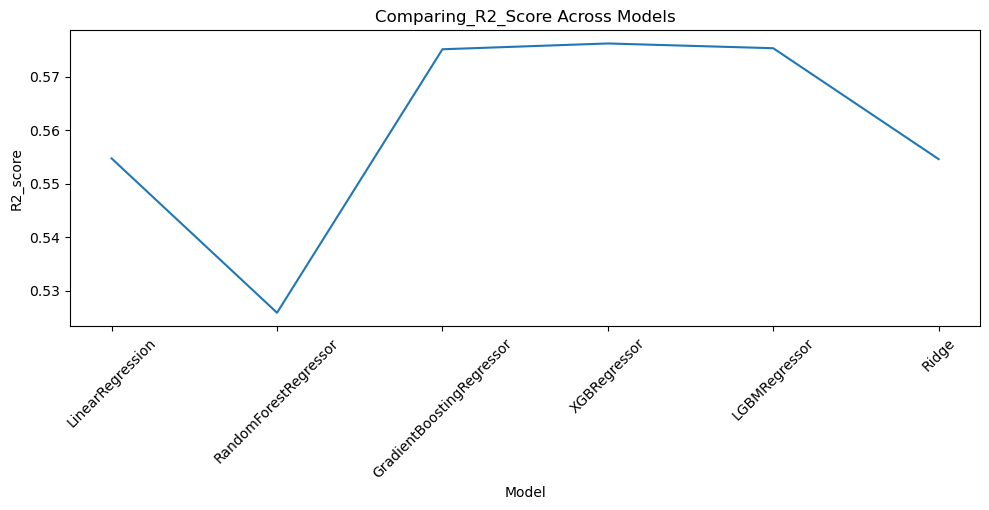

In [972]:
plt.figure(figsize = (10,5))
sns.lineplot(data = visual, x= 'Model' , y = 'R2_score')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title('Comparing_R2_Score Across Models')

Text(0.5, 1.0, 'Comparing_Mean_Square_Error_Score Across Models')

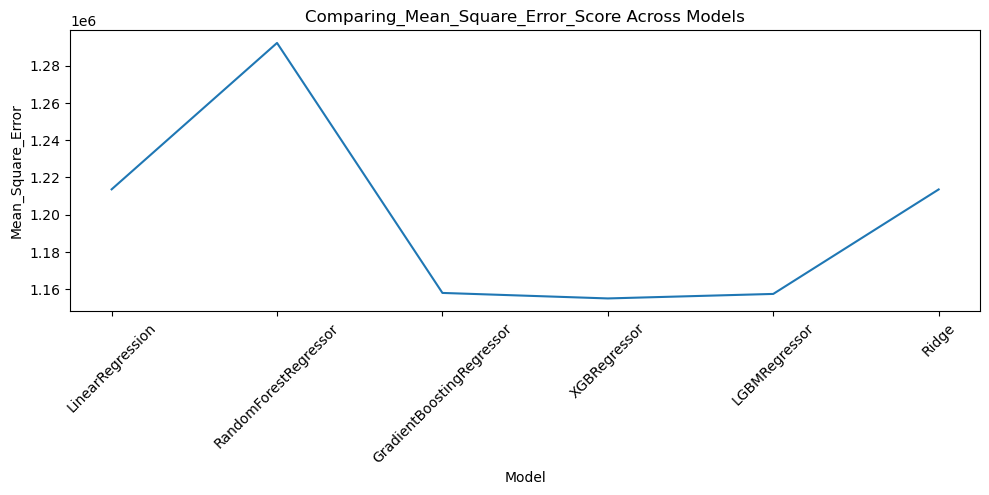

In [973]:
plt.figure(figsize = (10,5))
sns.lineplot(data = visual, x= 'Model' , y = 'Mean_Square_Error')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title('Comparing_Mean_Square_Error_Score Across Models')

In [974]:
### basically LightGBM giving the Best Accuracy among all the Models 

In [975]:
##Test_Data

## Prediction On TEST_DATA

In [976]:
#### The XGBoost giving the highest R2_SCORE  with minimum_squared_error among all models 
#### so for predicting Y Variables on Test data we are going for XGBOOST

In [977]:
Big_Mart_Test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1114,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
1,1078,8.30,Regular,0.04,Dairy,87.32,OUT017,2007,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,1420,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,1,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,817,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,1197,12.70,Regular,0.12,Dairy,234.23,OUT027,1985,1,2,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,233,10.50,Regular,0.01,Snack Foods,141.32,OUT046,1997,2,0,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
5677,308,7.60,Regular,0.14,Starchy Foods,169.14,OUT018,2009,1,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
5678,1426,10.00,Low Fat,0.07,Health and Hygiene,118.74,OUT045,2002,1,1,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
5679,521,15.30,Regular,0.00,Canned,214.62,OUT017,2007,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [978]:
Big_Mart_Test.drop(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Type'],axis = 1,inplace = True)

In [979]:
Big_Mart_Test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Visiblity_Ratio,Outlet_Age,Item_Fat_Content_Regular,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1114,20.75,0.01,107.86,1999,1,0,1.04,26,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
1,1078,8.30,0.04,87.32,2007,1,1,1.21,18,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,1420,14.60,0.10,241.75,1998,1,2,1.43,27,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,817,7.32,0.02,155.03,2007,1,1,1.01,18,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,1197,12.70,0.12,234.23,1985,1,2,1.00,40,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,233,10.50,0.01,141.32,1997,2,0,1.00,28,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
5677,308,7.60,0.14,169.14,2009,1,2,0.84,16,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
5678,1426,10.00,0.07,118.74,2002,1,1,1.84,23,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
5679,521,15.30,0.00,214.62,2007,1,1,0.00,18,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [980]:
data_std_columns

,Item_Identifier,Item_MRP,Item_Visibility,Item_Visiblity_Ratio,Item_Weight,Outlet_Age,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Item_Fat_Content_Regular,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-1.39,1.75,-0.99,-0.22,-0.84,-0.14,0.14,-1.37,-0.28,-0.74,...,-0.35,-0.26,-0.35,-0.35,-0.35,-0.35,2.86,0.73,-0.35,-0.35
1,-1.72,-1.49,-0.93,0.02,-1.65,-1.33,1.33,1.09,-0.28,1.35,...,2.86,-0.26,-0.35,-0.35,-0.35,-0.35,-0.35,-1.38,2.86,-0.35
2,-0.26,0.01,-0.98,-0.48,1.10,-0.14,0.14,-1.37,-0.28,-0.74,...,-0.35,-0.26,-0.35,-0.35,-0.35,-0.35,2.86,0.73,-0.35,-0.35
3,0.76,0.66,-1.31,-2.91,1.50,-0.02,0.02,1.09,-0.28,1.35,...,-0.35,-0.26,-0.35,-0.35,-0.35,-0.35,-0.35,-1.38,-0.35,-0.35
4,1.15,-1.40,-1.31,-2.91,-0.93,1.29,-1.29,1.09,-1.95,-0.74,...,-0.35,-0.26,-0.35,-0.35,-0.35,-0.35,-0.35,0.73,-0.35,-0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.91,1.18,-0.18,-0.23,-1.42,1.29,-1.29,1.09,-1.95,-0.74,...,-0.35,-0.26,-0.35,-0.35,-0.35,-0.35,-0.35,0.73,-0.35,-0.35
8519,0.26,-0.53,-0.37,0.01,-1.06,-0.50,0.50,-0.14,-0.28,1.35,...,-0.35,-0.26,-0.35,-0.35,2.86,-0.35,-0.35,0.73,-0.35,-0.35
8520,1.29,-0.90,-0.61,0.00,-0.54,-0.74,0.74,-0.14,1.38,-0.74,...,-0.35,-0.26,-0.35,2.86,-0.35,-0.35,-0.35,0.73,-0.35,-0.35
8521,-0.22,-0.61,1.59,0.60,-1.34,-1.33,1.33,1.09,-0.28,1.35,...,2.86,-0.26,-0.35,-0.35,-0.35,-0.35,-0.35,-1.38,2.86,-0.35


In [981]:
Big_Mart_Test = Big_Mart_Test[data_std_columns.columns]

In [982]:
data_std =pd.DataFrame(std.transform(Big_Mart_Test),columns = Big_Mart_Test.columns)

In [983]:
Big_Mart_Test = data_std[final_selected_columns]

In [984]:
Big_Mart_Test

,Outlet_Identifier_OUT027,Item_Type_Breads,Item_Fat_Content_Regular,Outlet_Identifier_OUT046,Item_Type_Breakfast,Item_Identifier,Outlet_Location_Type,Item_Type_Dairy,Item_Type_Household,Outlet_Identifier_OUT013,...,Item_Type_Snack Foods,Outlet_Identifier_OUT019,Item_Visiblity_Ratio,Item_Type_Soft Drinks,Outlet_Identifier_OUT017,Item_Visibility,Outlet_Type_Supermarket Type1,Outlet_Establishment_Year,Outlet_Age,Item_Weight
0,-0.35,-0.17,-0.74,-0.35,-0.11,0.74,-1.37,-0.29,-0.35,-0.35,...,2.47,-0.26,0.11,-0.23,-0.35,-1.16,0.73,0.14,-0.14,1.87
1,-0.35,-0.17,1.35,-0.35,-0.11,0.66,-0.14,3.39,-0.35,-0.35,...,-0.40,-0.26,0.61,-0.23,2.86,-0.55,0.73,1.10,-1.10,-1.08
2,-0.35,-0.17,-0.74,-0.35,-0.11,1.43,1.09,-0.29,-0.35,-0.35,...,-0.40,-0.26,1.27,-0.23,-0.35,0.68,-1.38,0.02,-0.02,0.41
3,-0.35,-0.17,-0.74,-0.35,-0.11,0.08,-0.14,-0.29,-0.35,-0.35,...,2.47,-0.26,0.02,-0.23,2.86,-1.01,0.73,1.10,-1.10,-1.31
4,2.85,-0.17,1.35,-0.35,-0.11,0.93,1.09,3.39,-0.35,-0.35,...,-0.40,-0.26,-0.01,-0.23,-0.35,1.06,-1.38,-1.53,1.53,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.35,-0.17,1.35,2.86,-0.11,-1.22,-1.37,-0.29,-0.35,-0.35,...,2.47,-0.26,0.00,-0.23,-0.35,-1.04,0.73,-0.10,0.10,-0.56
5677,-0.35,-0.17,1.35,-0.35,-0.11,-1.05,1.09,-0.29,-0.35,-0.35,...,-0.40,-0.26,-0.45,-0.23,-0.35,1.54,-1.38,1.33,-1.33,-1.25
5678,-0.35,-0.17,-0.74,-0.35,-0.11,1.44,-0.14,-0.29,-0.35,-0.35,...,-0.40,-0.26,2.46,-0.23,-0.35,0.16,0.73,0.50,-0.50,-0.68
5679,-0.35,-0.17,1.35,-0.35,-0.11,-0.58,-0.14,-0.29,-0.35,-0.35,...,-0.40,-0.26,-2.91,-0.23,2.86,-1.31,0.73,1.10,-1.10,0.58


In [985]:
test_prediction_log = xg_cv.predict(Big_Mart_Test)
test_prediction = np.expm1(test_prediction_log)

In [986]:
Big_Mart_Test['Item_Outlet_Sales'] = test_prediction

In [987]:
Big_Mart_Test

,Outlet_Identifier_OUT027,Item_Type_Breads,Item_Fat_Content_Regular,Outlet_Identifier_OUT046,Item_Type_Breakfast,Item_Identifier,Outlet_Location_Type,Item_Type_Dairy,Item_Type_Household,Outlet_Identifier_OUT013,...,Outlet_Identifier_OUT019,Item_Visiblity_Ratio,Item_Type_Soft Drinks,Outlet_Identifier_OUT017,Item_Visibility,Outlet_Type_Supermarket Type1,Outlet_Establishment_Year,Outlet_Age,Item_Weight,Item_Outlet_Sales
0,-0.35,-0.17,-0.74,-0.35,-0.11,0.74,-1.37,-0.29,-0.35,-0.35,...,-0.26,0.11,-0.23,-0.35,-1.16,0.73,0.14,-0.14,1.87,1508.86
1,-0.35,-0.17,1.35,-0.35,-0.11,0.66,-0.14,3.39,-0.35,-0.35,...,-0.26,0.61,-0.23,2.86,-0.55,0.73,1.10,-1.10,-1.08,1272.84
2,-0.35,-0.17,-0.74,-0.35,-0.11,1.43,1.09,-0.29,-0.35,-0.35,...,-0.26,1.27,-0.23,-0.35,0.68,-1.38,0.02,-0.02,0.41,465.23
3,-0.35,-0.17,-0.74,-0.35,-0.11,0.08,-0.14,-0.29,-0.35,-0.35,...,-0.26,0.02,-0.23,2.86,-1.01,0.73,1.10,-1.10,-1.31,2401.29
4,2.85,-0.17,1.35,-0.35,-0.11,0.93,1.09,3.39,-0.35,-0.35,...,-0.26,-0.01,-0.23,-0.35,1.06,-1.38,-1.53,1.53,-0.04,5395.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.35,-0.17,1.35,2.86,-0.11,-1.22,-1.37,-0.29,-0.35,-0.35,...,-0.26,0.00,-0.23,-0.35,-1.04,0.73,-0.10,0.10,-0.56,1894.05
5677,-0.35,-0.17,1.35,-0.35,-0.11,-1.05,1.09,-0.29,-0.35,-0.35,...,-0.26,-0.45,-0.23,-0.35,1.54,-1.38,1.33,-1.33,-1.25,2014.52
5678,-0.35,-0.17,-0.74,-0.35,-0.11,1.44,-0.14,-0.29,-0.35,-0.35,...,-0.26,2.46,-0.23,-0.35,0.16,0.73,0.50,-0.50,-0.68,1601.14
5679,-0.35,-0.17,1.35,-0.35,-0.11,-0.58,-0.14,-0.29,-0.35,-0.35,...,-0.26,-2.91,-0.23,2.86,-1.31,0.73,1.10,-1.10,0.58,3167.62
